# Training CNN model to predict Mask and No Mask  (Images)



# Install Packages

In [1]:
pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 15kB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 3.9MB 26.1MB/s 
     |████████████████████████████████| 450kB 52.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=37de9c1b1e8844ac8355b9e191c183bc715b3a3617b17feb8f7baec4c7996fc1
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tens

In [2]:
pip install keras==2.3.1

     |████████████████████████████████| 378kB 4.6MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


# Training model

In [3]:
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

# for accuracy and loss graph
import matplotlib.pyplot as plt

import tensorflow

print(keras.__version__)
print(tensorflow.__version__)

Using TensorFlow backend.


2.3.1
2.1.0


In [4]:
train_data_path = "/content/drive/My Drive/My ML Project /DL Project/CNN/mask detection/dataset/train"
validation_data_path = "/content/drive/My Drive/My ML Project /DL Project/CNN/mask detection/dataset/valid"

In [5]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [6]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(200, 200), # all images will be resized to 150x150
                                      batch_size=128,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 3649 images belonging to 2 classes.


In [7]:
training_data.class_indices

{'with_mask': 0, 'without_mask': 1}

In [8]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(200,200),
                                  batch_size=128,
                                  class_mode='binary')

Found 806 images belonging to 2 classes.


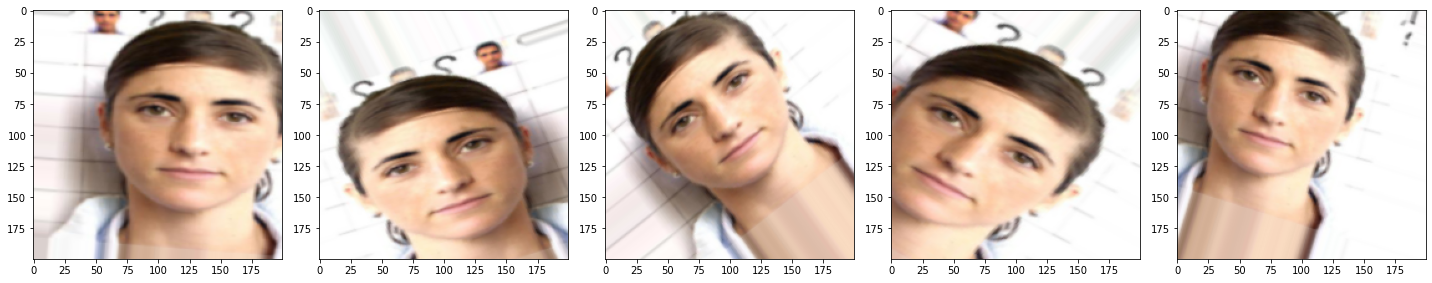

In [9]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [10]:
# save best model using vall accuracy
model_path = '/content/drive/My Drive/My ML Project /DL Project/CNN/mask detection/model/model.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [11]:

#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=5, input_shape=[200, 200, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(4,4)),
                                    keras.layers.Conv2D(filters=64, kernel_size=4),
                                    keras.layers.MaxPooling2D(pool_size=(3,3)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=2),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])


# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#cnn_model.compile(optimizer = Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=50, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 14.25

Epoch 1/50


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 27 could not be retrieved. It could be because a worker has died.
  UserWarning)


 1/29 [>.............................] - ETA: 29:42 - loss: 0.7271 - accuracy: 0.5000

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 22 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 2/29 [=>............................] - ETA: 25:25 - loss: 0.7239 - accuracy: 0.5312

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 14 could not be retrieved. It could be because a worker has died.
  UserWarning)


 3/29 [==>...........................] - ETA: 24:22 - loss: 0.7107 - accuracy: 0.5469

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 10 could not be retrieved. It could be because a worker has died.
  UserWarning)


 5/29 [====>.........................] - ETA: 18:18 - loss: 0.6939 - accuracy: 0.5688

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 18 could not be retrieved. It could be because a worker has died.
  UserWarning)


 6/29 [=====>........................] - ETA: 18:18 - loss: 0.6902 - accuracy: 0.5664

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 4 could not be retrieved. It could be because a worker has died.
  UserWarning)


 7/29 [======>.......................] - ETA: 18:11 - loss: 0.6836 - accuracy: 0.5804

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 6 could not be retrieved. It could be because a worker has died.
  UserWarning)


 8/29 [=======>......................] - ETA: 17:46 - loss: 0.6759 - accuracy: 0.5967

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 26 could not be retrieved. It could be because a worker has died.
  UserWarning)


 9/29 [========>.....................] - ETA: 17:19 - loss: 0.6766 - accuracy: 0.5981

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2 could not be retrieved. It could be because a worker has died.
  UserWarning)


10/29 [=========>....................] - ETA: 16:46 - loss: 0.6690 - accuracy: 0.6055

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 16 could not be retrieved. It could be because a worker has died.
  UserWarning)


11/29 [==========>...................] - ETA: 16:00 - loss: 0.6646 - accuracy: 0.6087

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 21 could not be retrieved. It could be because a worker has died.
  UserWarning)


12/29 [===========>..................] - ETA: 15:13 - loss: 0.6569 - accuracy: 0.6198

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 20 could not be retrieved. It could be because a worker has died.
  UserWarning)


13/29 [============>.................] - ETA: 14:20 - loss: 0.6466 - accuracy: 0.6280

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 13 could not be retrieved. It could be because a worker has died.
  UserWarning)


14/29 [=============>................] - ETA: 13:30 - loss: 0.6374 - accuracy: 0.6345

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 17 could not be retrieved. It could be because a worker has died.
  UserWarning)


15/29 [==============>...............] - ETA: 12:39 - loss: 0.6239 - accuracy: 0.6479

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 5 could not be retrieved. It could be because a worker has died.
  UserWarning)


16/29 [===============>..............] - ETA: 11:44 - loss: 0.6157 - accuracy: 0.6577

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 23 could not be retrieved. It could be because a worker has died.
  UserWarning)


17/29 [================>.............] - ETA: 10:53 - loss: 0.6036 - accuracy: 0.6668

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 24 could not be retrieved. It could be because a worker has died.
  UserWarning)


18/29 [=================>............] - ETA: 10:00 - loss: 0.5949 - accuracy: 0.6727

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 12 could not be retrieved. It could be because a worker has died.
  UserWarning)


19/29 [==================>...........] - ETA: 9:06 - loss: 0.5834 - accuracy: 0.6817 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 11 could not be retrieved. It could be because a worker has died.
  UserWarning)


20/29 [===================>..........] - ETA: 8:13 - loss: 0.5708 - accuracy: 0.6902

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 25 could not be retrieved. It could be because a worker has died.
  UserWarning)


21/29 [====================>.........] - ETA: 7:18 - loss: 0.5610 - accuracy: 0.6972

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 9 could not be retrieved. It could be because a worker has died.
  UserWarning)


22/29 [=====================>........] - ETA: 6:26 - loss: 0.5551 - accuracy: 0.7024

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 7 could not be retrieved. It could be because a worker has died.
  UserWarning)


23/29 [======================>.......] - ETA: 5:31 - loss: 0.5454 - accuracy: 0.7086

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 15 could not be retrieved. It could be because a worker has died.
  UserWarning)


24/29 [=======================>......] - ETA: 4:36 - loss: 0.5350 - accuracy: 0.7155

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 8 could not be retrieved. It could be because a worker has died.
  UserWarning)


25/29 [========================>.....] - ETA: 3:42 - loss: 0.5343 - accuracy: 0.7197

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 28 could not be retrieved. It could be because a worker has died.
  UserWarning)


26/29 [=========================>....] - ETA: 2:44 - loss: 0.5257 - accuracy: 0.7225

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 19 could not be retrieved. It could be because a worker has died.
  UserWarning)


27/29 [==========================>...] - ETA: 1:49 - loss: 0.5176 - accuracy: 0.7289

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1 could not be retrieved. It could be because a worker has died.
  UserWarning)


28/29 [===========================>..] - ETA: 55s - loss: 0.5125 - accuracy: 0.7327 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 3 could not be retrieved. It could be because a worker has died.
  UserWarning)


29/29 [==============================] - 1602s 55s/step - loss: 0.5050 - accuracy: 0.7377 - val_loss: 0.1890 - val_accuracy: 0.8970

Epoch 00001: val_accuracy improved from -inf to 0.89702, saving model to /content/drive/My Drive/My ML Project /DL Project/CNN/mask detection/model/model.h5
Epoch 2/50
29/29 [==============================] - 48s 2s/step - loss: 0.3289 - accuracy: 0.8844 - val_loss: 0.1861 - val_accuracy: 0.9429

Epoch 00002: val_accuracy improved from 0.89702 to 0.94293, saving model to /content/drive/My Drive/My ML Project /DL Project/CNN/mask detection/model/model.h5
Epoch 3/50
29/29 [==============================] - 47s 2s/step - loss: 0.2854 - accuracy: 0.8950 - val_loss: 0.1195 - val_accuracy: 0.9057

Epoch 00003: val_accuracy did not improve from 0.94293
Epoch 4/50
29/29 [==============================] - 46s 2s/step - loss: 0.2751 - accuracy: 0.8983 - val_loss: 0.1171 - val_accuracy: 0.9479

Epoch 00004: val_accuracy improved from 0.94293 to 0.94789, saving model

In [13]:
cnn_model.save('/content/drive/My Drive/My ML Project /DL Project/CNN/mask detection/model/model_last.h5')

In [15]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=50, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 14.25

Epoch 1/50
 6/29 [=====>........................] - ETA: 45s - loss: 0.1112 - accuracy: 0.9596

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


29/29 [==============================] - 45s 2s/step - loss: 0.1241 - accuracy: 0.9572 - val_loss: 0.0348 - val_accuracy: 0.9777

Epoch 00001: val_accuracy did not improve from 0.98635
Epoch 2/50
29/29 [==============================] - 44s 2s/step - loss: 0.1092 - accuracy: 0.9583 - val_loss: 0.0748 - val_accuracy: 0.9826

Epoch 00002: val_accuracy did not improve from 0.98635
Epoch 3/50
29/29 [==============================] - 44s 2s/step - loss: 0.1098 - accuracy: 0.9638 - val_loss: 0.0358 - val_accuracy: 0.9814

Epoch 00003: val_accuracy did not improve from 0.98635
Epoch 4/50
29/29 [==============================] - 44s 2s/step - loss: 0.1106 - accuracy: 0.9597 - val_loss: 0.0420 - val_accuracy: 0.9826

Epoch 00004: val_accuracy did not improve from 0.98635
Epoch 5/50
29/29 [==============================] - 44s 2s/step - loss: 0.1436 - accuracy: 0.9449 - val_loss: 0.0478 - val_accuracy: 0.9839

Epoch 00005: val_accuracy did not improve from 0.98635
Epoch 6/50
29/29 [=============

In [ ]:
cnn_model.save('/content/drive/My Drive/My ML Project /DL Project/CNN/mask detection/model/model_last.h5')

In [14]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(cnn_model.history['loss'], label='train loss')
plt.plot(cnn_model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(cnn_model.history['accuracy'], label='train acc')
plt.plot(cnn_model.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

TypeError: ignored